In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv("C:\\Users\\HP\\Desktop\\ISY 459 selected topics Ds\\train_E6oV3lV.csv")
test = pd.read_csv("C:\\Users\\HP\\Desktop\\ISY 459 selected topics Ds\\test_tweets_anuFYb8.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
combi = train.append(test, ignore_index=True)


<ipython-input-4-1ed90ee23215>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)


# A) Removing Twitter Handles (@user)


In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [6]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

# B) Removing Punctuations, Numbers, and Special Characters


In [7]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

combi.head()


<ipython-input-7-5e6aa9dd8998>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


# C) Removing Short Words


In [8]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [9]:
combi.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combi['tidy_tweet'].head()

0    when father dysfunctional selfish drags kids i...
1    thanks #lyft credit cause they offer wheelchai...
2                                  bihday your majesty
3                           #model love take with time
4                       factsguide society #motivation
Name: tidy_tweet, dtype: object

In [11]:
freq = pd.Series(' '.join(combi['tidy_tweet'] ).split()).value_counts()[:10]

freq = list(freq.index)
combi['tidy_tweet']  = combi['tidy_tweet'] .apply(lambda x: " ".join(x for x in x.split() if x not in freq))
combi['tidy_tweet'] .head()

0    when father dysfunctional selfish drags kids i...
1    thanks #lyft credit cause they offer wheelchai...
2                                       bihday majesty
3                                     #model take time
4                       factsguide society #motivation
Name: tidy_tweet, dtype: object

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
combi['tidy_tweet'].head()


0    father dysfunctional selfish drags kids dysfun...
1    thanks #lyft credit cause offer wheelchair van...
2                                       bihday majesty
3                                     #model take time
4                       factsguide society #motivation
Name: tidy_tweet, dtype: object

# D) Tokenization


In [13]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                                 [#model, take, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

# E) Stemming


In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, caus, offer, wheelchair...
2                                    [bihday, majesti]
3                                 [#model, take, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

# 3. Story Generation and Visualization from Tweets


# A) Understanding the common words used in the tweets: WordCloud


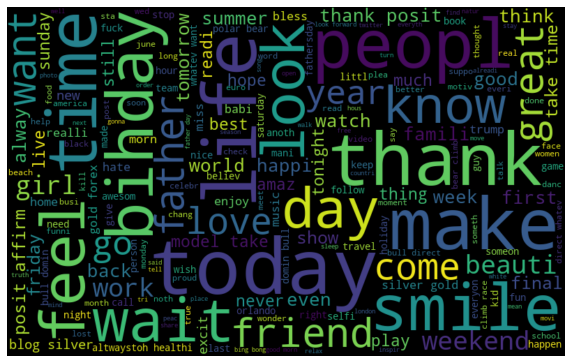

In [16]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=24, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

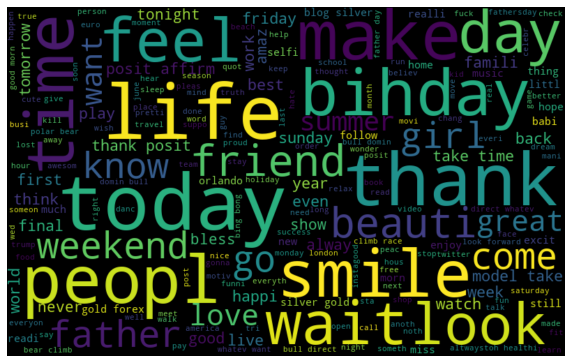

In [17]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

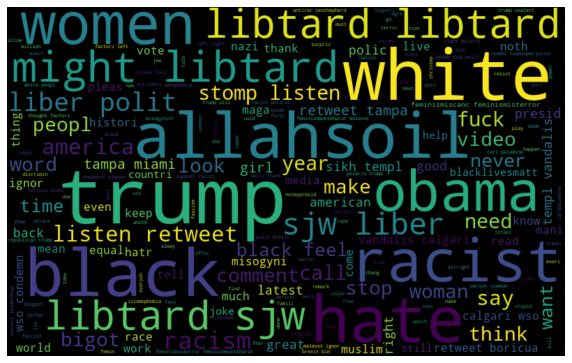

In [18]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [20]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

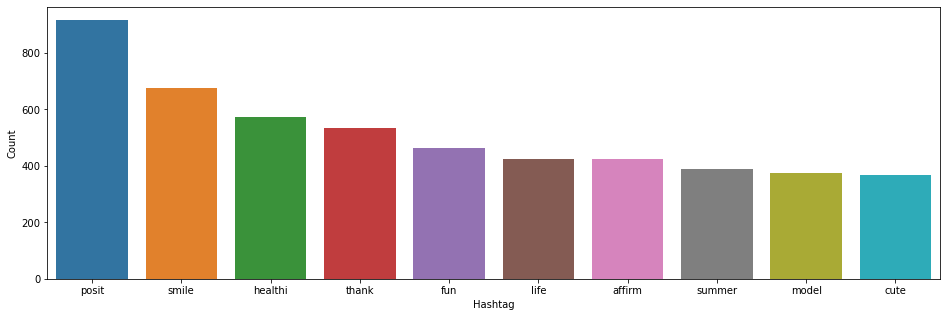

In [21]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

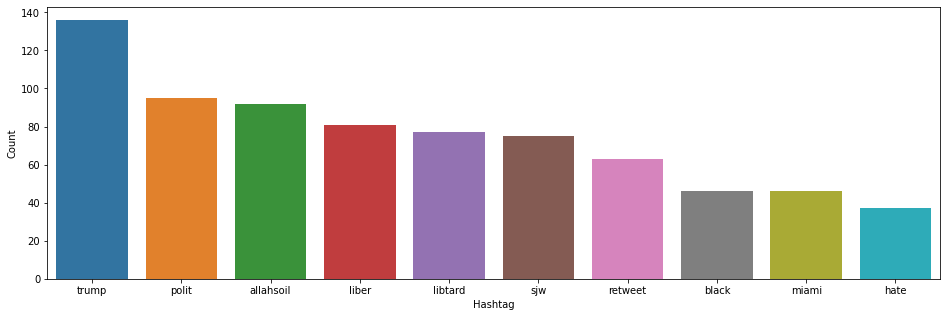

In [22]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


In [24]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))
train[['tweet','avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 176663 stored elements in Compressed Sparse Row format>

In [26]:
import numpy as np
import scipy as sc
from scipy.sparse import csr_matrix


In [27]:
from nltk.tokenize import RegexpTokenizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000,  analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(combi['tidy_tweet'])

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# TASK 1

# Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

ny = MultinomialNB()
ny.fit(xtrain_bow, ytrain)

prediction = ny.predict_proba(xvalid_bow)

prediction_int = prediction[:,1] >= 0.3 

prediction_int = prediction_int.astype(np.int)


Acc=accuracy_score(yvalid, prediction_int)

per=precision_score(yvalid, prediction_int)

F1=f1_score(yvalid, prediction_int) # calculating f1 score

recall=recall_score(yvalid, prediction_int) 


Bow_nvResult= Acc*100,per*100,recall*100,F1*100
Bow_nvResult

(92.1785379080196, 46.11764705882353, 57.30994152046783, 51.10821382007822)

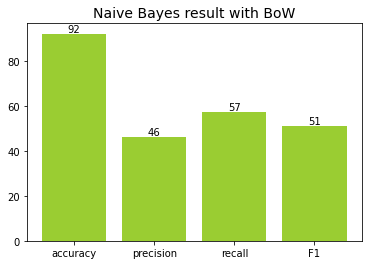

In [32]:
re = Bow_nvResult
Names = ['accuracy', 'precision', 'recall','F1']

plt.bar(Names,re, color ="yellowgreen")

for x,y in zip(Names,re):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')
    
plt.title("Naive Bayes result with BoW" ,fontsize = 14)

plt.show()

In [33]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]


ny = MultinomialNB()
ny.fit(xtrain_tfidf, ytrain)

prediction = ny.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3 

prediction_int = prediction_int.astype(np.int)


F1=f1_score(yvalid, prediction_int) # calculating f1 score

Acc=accuracy_score(yvalid, prediction_int)

per=precision_score(yvalid, prediction_int)

recall=recall_score(yvalid, prediction_int) 


tf_nvResult= Acc*100,per*100,recall*100,F1*100
tf_nvResult

(94.39983314214204, 66.66666666666666, 42.98245614035088, 52.26666666666666)

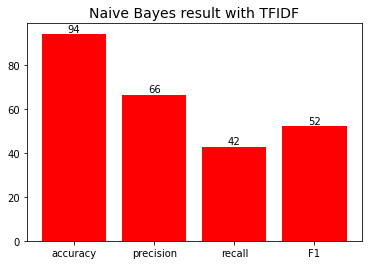

In [34]:
re = tf_nvResult
Names = ['accuracy', 'precision', 'recall','F1']

plt.bar(Names,re, color ="red")

for x,y in zip(Names,re):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')
    
plt.title("Naive Bayes result with TFIDF" ,fontsize = 14)

plt.show()

# DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier


train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set

treeBOW =DecisionTreeClassifier(random_state=0)
treeBOW.fit(xtrain_bow, ytrain)

prediction = treeBOW.predict_proba(xvalid_bow)

prediction_int = prediction[:,1] >= 0.3 

prediction_int = prediction_int.astype(np.int)


Acc=accuracy_score(yvalid, prediction_int)

per=precision_score(yvalid, prediction_int)

F1=f1_score(yvalid, prediction_int) # calculating f1 score

recall=recall_score(yvalid, prediction_int) 


Bow_DtResult= Acc*100,per*100,recall*100,F1*100
Bow_DtResult

(89.70695588695379, 36.036866359447004, 57.163742690058484, 44.205765969474285)

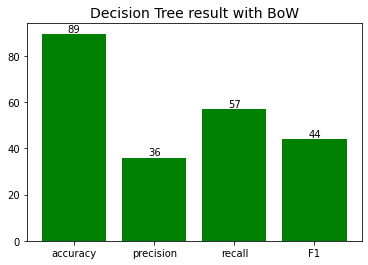

In [36]:
re = Bow_DtResult
Names = ['accuracy', 'precision', 'recall','F1']

plt.bar(Names,re, color ="green")

for x,y in zip(Names,re):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')
    
plt.title("Decision Tree result with BoW" ,fontsize = 14)

plt.show()

In [37]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]


treeTF = DecisionTreeClassifier(random_state=0)
treeTF.fit(xtrain_tfidf, ytrain)

prediction = treeTF.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3 

prediction_int = prediction_int.astype(np.int)



Acc=accuracy_score(yvalid, prediction_int)

per=precision_score(yvalid, prediction_int)

F1=f1_score(yvalid, prediction_int) # calculating f1 score

recall=recall_score(yvalid, prediction_int) 


tf_DtResult= Acc*100,per*100,recall*100,F1*100
tf_DtResult

(93.85754510376472, 58.71559633027523, 46.783625730994146, 52.07485760781123)

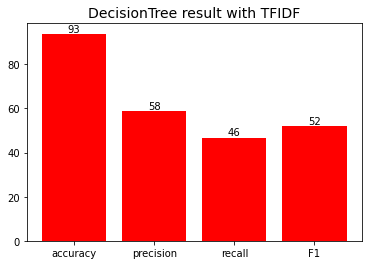

In [38]:
re = tf_DtResult
Names = ['accuracy', 'precision', 'recall','F1']

plt.bar(Names,re, color ="red")

for x,y in zip(Names,re):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')
    
plt.title("DecisionTree result with TFIDF" ,fontsize = 14)

plt.show()

# knn


In [39]:
from sklearn.neighbors import KNeighborsClassifier


train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set

knnBOW = KNeighborsClassifier(n_neighbors=5)

knnBOW.fit(xtrain_bow, ytrain)

prediction = knnBOW.predict_proba(xvalid_bow)

prediction_int = prediction[:,1] >= 0.3 

prediction_int = prediction_int.astype(np.int)


Acc=accuracy_score(yvalid, prediction_int)

per=precision_score(yvalid, prediction_int)

F1=f1_score(yvalid, prediction_int) # calculating f1 score

recall=recall_score(yvalid, prediction_int) 


Bow_knnResult= Acc*100,per*100,recall*100,F1*100
Bow_knnResult

(92.66868286578371, 48.45528455284553, 43.567251461988306, 45.881447267128564)

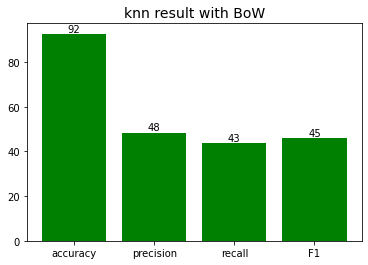

In [40]:
re = Bow_knnResult
Names = ['accuracy', 'precision', 'recall','F1']

plt.bar(Names,re, color ="green")

for x,y in zip(Names,re):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')
    
plt.title("knn result with BoW" ,fontsize = 14)

plt.show()

In [41]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]


knnTF = KNeighborsClassifier(n_neighbors=11)

knnTF.fit(xtrain_tfidf, ytrain)

prediction = knnTF.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3 

prediction_int = prediction_int.astype(np.int)



Acc=accuracy_score(yvalid, prediction_int)

per=precision_score(yvalid, prediction_int)

F1=f1_score(yvalid, prediction_int) # calculating f1 score

recall=recall_score(yvalid, prediction_int) 


tf_knnResult= Acc*100,per*100,recall*100,F1*100
tf_knnResult



(93.50297215559496, 57.53086419753086, 34.06432748538012, 42.79155188246098)

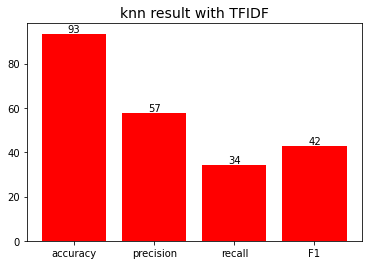

In [42]:
re = tf_knnResult
Names = ['accuracy', 'precision', 'recall','F1']

plt.bar(Names,re, color ="red")

for x,y in zip(Names,re):
    plt.text(x, y, '%d' % y, ha='center' , va= 'bottom')
    
plt.title("knn result with TFIDF" ,fontsize = 14)

plt.show()

# LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

F1=f1_score(yvalid, prediction_int) # calculating f1 score

lg_F1bow = F1
lg_F1bow

0.5295109612141653

In [44]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

F1=f1_score(yvalid, prediction_int)

lg_F1tf = F1
lg_F1tf


0.5438441098317095

# TASK 3

# WORDEMBDINGS 


In [45]:
import gensim; print("gensim", gensim.__version__)
from gensim.models import word2vec;print("FAST_VERSION", word2vec.FAST_VERSION)

gensim 4.2.0
FAST_VERSION 1


In [46]:
import gensim


In [47]:

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(5750572, 6467360)

In [48]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))           

            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [49]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200) 
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [50]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) 

prediction = lreg.predict_proba(xvalid_w2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

F1=f1_score(yvalid, prediction_int)

lg_F1w2v= F1
lg_F1w2v

0.6047516198704103

In [51]:
print("result:")
print('\t Word2vec = %.2f'% lg_F1w2v )
print('\t Bow = %.2f' % lg_F1bow)
print('\t tfidf = %.2f' % lg_F1tf)
     

result:
	 Word2vec = 0.60
	 Bow = 0.53
	 tfidf = 0.54


###  we see after I used word2vec feature method with 200 feature  the f1 achieved the highest result with 60% and bow with 53% and tfidf with 54% all of them done by logistic regression 

# TASK 4

## first experiment

### change feature number to 1500 from 1000 and still use unigram

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,ngram_range=(1,1) ,max_features=1500, stop_words='english')
# TF-IDF feature matrix
tfidf1 = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf1


<49159x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 195942 stored elements in Compressed Sparse Row format>

In [53]:
train_tfidf = tfidf1[:31962,:]
test_tfidf = tfidf1[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

F1=f1_score(yvalid, prediction_int)
F1

0.5637342908438061

### the result improved on the tfidf 

## second experiment

### change feature number to 1500 from 1000 and still use unigram and add ***Lemmatization*** instead of stemming 

In [54]:
from textblob import Word
combi['LEM_tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
combi['LEM_tidy_tweet'].head()

0       father dysfunct selfish drag kid dysfunct #run
1    thank #lyft credit caus offer wheelchair van #...
2                                       bihday majesti
3                                     #model take time
4                             factsguid societi #motiv
Name: LEM_tidy_tweet, dtype: object

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,ngram_range=(1,1) ,max_features=1500, stop_words='english')
# TF-IDF feature matrix
tfidf2 = tfidf_vectorizer.fit_transform(combi['LEM_tidy_tweet'] )
tfidf2


<49159x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 195995 stored elements in Compressed Sparse Row format>

In [56]:
train_tfidf = tfidf2[:31962,:]
test_tfidf = tfidf2[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

F1=f1_score(yvalid, prediction_int)
F1

0.568100358422939

### the result also improved on the tfidf 

## thierd experiment

### use bag of words with the Lemmatized tweet also with 1500 feature

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1500, stop_words='english')
# bag-of-words feature matrix
bow2 = bow_vectorizer.fit_transform(combi['LEM_tidy_tweet'])
bow2

<49159x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 195995 stored elements in Compressed Sparse Row format>

In [58]:
train_tfidf = bow2[:31962,:]
test_tfidf = bow2[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

F1=f1_score(yvalid, prediction_int)
F1

0.5614035087719298

### the result also improved with bag of words using the Lemmatization 